## Business Overview
---

### Introduction

Real estate is one of the most important sectors of any economy. Understanding the key drivers of housing prices can provide valuable insights for both buyers and sellers in the market. In this project, we analyze a data set of house sales in a northwestern county to identify the factors that influence housing prices in the area.

## Business Understanding
The real estate agency helps homeowners buy and/or sell homes. One of the key services they provide is advice to homeowners about how home renovations can increase the estimated value of their homes. The agency is interested in developing a model that can predict the estimated value of a home after renovations, based on the type and cost of the renovations.


### Business Problem
The real estate agency needs to provide accurate advice to homeowners about how home renovations can increase the estimated value of their homes, and by what amount. However, the agency currently lacks a reliable method for predicting the impact of specific home renovations on home value. As a result, the agency is unable to provide accurate advice to homeowners about the potential return on investment for different renovation projects.

However,
Identifying the features that influence pricing can help the agency understand which factors are most important in determining the value of a home, and can guide their advice to homeowners about which renovations might increase the value of their homes.

Analyzing trends in house prices over time and predicting future prices can help the agency make informed decisions about when to buy or sell properties and can also be used to provide advice to homeowners about when might be the best time to sell their homes.

Identifying undervalued properties and recommending better prices can help the agency maximize their profits by ensuring that they are buying properties at the best possible price and selling them at a fair market value.

---
### Data Understanding

The relevant dataset used in this project is the [kc_house_data](https://github.com/dorinelangat/dsc-phase-2-project-v2-3/tree/main/data), found in the data folder of this repository.

The dataset contains information on sale prices for houses, property sizes, location, and the years of construction and renovation alongside other relavant information.


In [5]:
# Loading the libraries

# data
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import folium
import warnings

# modeling
import statsmodels.api as sm 

# statistics
import scipy.stats as stats
from sklearn.metrics import mean_absolute_error

# styling
plt.style.use('seaborn')
sns.set_style('whitegrid')

warnings.filterwarnings('ignore')

In [6]:
!pip install missingno

In [7]:
data = pd.read_csv("data/kc_house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [8]:
print(data.columns)

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


# Column info

In [9]:
cols = pd.read_csv("data/column_names.md", sep='|')
cols

,# Column Names and Descriptions for King County Data Set
0,* `id` - Unique identifier for a house
1,* `date` - Date house was sold
2,* `price` - Sale price (prediction target)
3,* `bedrooms` - Number of bedrooms
4,* `bathrooms` - Number of bathrooms
5,* `sqft_living` - Square footage of living spa...
6,* `sqft_lot` - Square footage of the lot
7,* `floors` - Number of floors (levels) in house
8,* `waterfront` - Whether the house is on a wat...
9,"* Includes Duwamish, Elliott Bay, Puget Soun..."


In [10]:
data.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,NO,NONE,...,7 Average,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

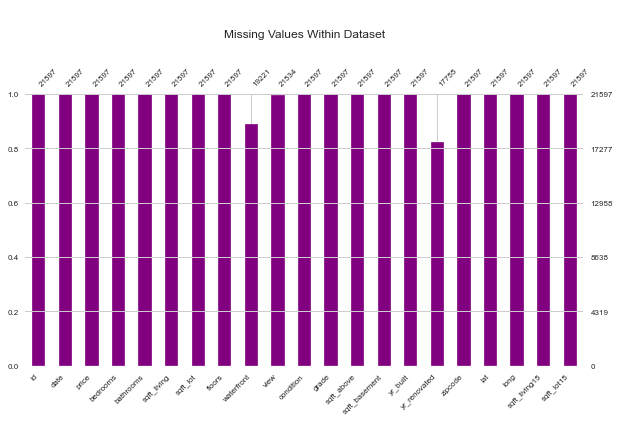

In [12]:
# Visualise the missing values in the dataset
msno.bar(data, color='purple', figsize=(10, 5), fontsize=8)
plt.title("""

Missing Values Within Dataset

""");

Based on the barplot above, we can see that there are missing values in the columns: <I> waterfront, view</i> and  <i>the year renovated</i> with 2376, 63 and 3842 missing values, respectively.

In [13]:
data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [14]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [15]:
data.corr()['price']


id              -0.016772
price            1.000000
bedrooms         0.308787
bathrooms        0.525906
sqft_living      0.701917
sqft_lot         0.089876
floors           0.256804
sqft_above       0.605368
yr_built         0.053953
yr_renovated     0.129599
zipcode         -0.053402
lat              0.306692
long             0.022036
sqft_living15    0.585241
sqft_lot15       0.082845
Name: price, dtype: float64

## Data Cleaning and Preparation

In [16]:
data.dropna(inplace=True)

In [17]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [18]:
duplicates = data[data.duplicated(['id'], keep=False)]
duplicates


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,7/25/2014,430000.0,3,1.50,1580,5000,1.0,NO,NONE,...,8 Good,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
94,6021501535,12/23/2014,700000.0,3,1.50,1580,5000,1.0,NO,NONE,...,8 Good,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
313,4139480200,6/18/2014,1380000.0,4,3.25,4290,12103,1.0,NO,GOOD,...,11 Excellent,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
314,4139480200,12/9/2014,1400000.0,4,3.25,4290,12103,1.0,NO,GOOD,...,11 Excellent,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
717,8820903380,7/28/2014,452000.0,6,2.25,2660,13579,2.0,NO,NONE,...,7 Average,2660,0.0,1937,1990.0,98125,47.7142,-122.286,1120,8242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20038,8648900110,8/26/2014,555000.0,3,2.50,1940,3211,2.0,NO,NONE,...,8 Good,1940,0.0,2009,0.0,98027,47.5644,-122.093,1880,3078
20164,7853400250,6/4/2014,610000.0,4,3.50,2910,5260,2.0,NO,NONE,...,9 Better,2910,0.0,2012,0.0,98065,47.5168,-121.883,2910,5260
20165,7853400250,2/19/2015,645000.0,4,3.50,2910,5260,2.0,NO,NONE,...,9 Better,2910,0.0,2012,0.0,98065,47.5168,-121.883,2910,5260
20763,6300000226,6/26/2014,240000.0,4,1.00,1200,2171,1.5,NO,NONE,...,7 Average,1200,0.0,1933,0.0,98133,47.7076,-122.342,1130,1598


The ids are duplicated because the same house was sold multiple times. Therefore, we shall be keeping the records.

In [19]:
#Converting the 'waterfront' column to a binary variable where 1 represents 'YES' and 0 represents 'NO'
#can also fill the NaN values with 0
data['waterfront'] = data['waterfront'].apply(lambda x: 1 if x == 'YES' else 0)
data['waterfront'] = data['waterfront'].fillna(0)

In [20]:
#Fill in the NaN values in the 'yr_renovated' column with the median value of the column
data['yr_renovated'] = data['yr_renovated'].fillna(data['yr_renovated'].median())

In [21]:
#Convert the 'condition' and 'grade' columns to ordinal variables
conditions = {'Poor': 1, 'Average': 2, 'Fair': 3, 'Good': 4, 'Very Good': 5, 'Excellent': 6}
data['condition'] = data['condition'].map(conditions)

grades = {'3 Poor': 1,'4 Low': 2,'5 Fair' : 3, '6 Low Average': 4, '7 Average': 5, '8 Good': 6, '9 Better': 7, '10 Very Good' : 8, '11 Excellent': 8, '12 Luxury': 9, '13 Mansion': 10}
data['grade'] = data['grade'].map(grades)

In [22]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,NONE,...,5,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,NONE,...,5,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,NONE,...,6,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0,NONE,...,8,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0,NONE,...,5,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,2/19/2015,475000.0,3,2.50,1310,1294,2.0,0,NONE,...,6,1180,130.0,2008,0.0,98116,47.5773,-122.409,1330,1265
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0,NONE,...,6,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0,NONE,...,6,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0,NONE,...,5,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007


In [23]:
# Replace "?" and " " values with NaN
data['sqft_basement'] = data['sqft_basement'].replace('?', np.nan).replace('', np.nan)

# Convert the column to float data type
data['sqft_basement'] = data['sqft_basement'].astype(float)

In [24]:
# Converting data to appropriate data types

# Convert the 'date' column to a datetime data type
data['date'] = pd.to_datetime(data['date'])

#The data types of the columns
print(data.dtypes)

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                     object
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement           float64
yr_built                  int64
yr_renovated            float64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object


# Identifying features influencing the pricing.

In [25]:
y = data['price']
X_baseline = data[['sqft_living']]
baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()
print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                 1.568e+04
Date:                Tue, 18 Apr 2023   Prob (F-statistic):               0.00
Time:                        20:54:54   Log-Likelihood:            -2.1911e+05
No. Observations:               15762   AIC:                         4.382e+05
Df Residuals:                   15760   BIC:                         4.382e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -5.516e+04   5205.744    -10.597      

* The model is statistically significant overall, with an F-statistic p-value well below 0.05
* The model explains about 49.9% of the variance in price
* The model coefficients (const and sqft_living) are both statistically significant, with t-statistic p-values well below 0.05
* The coefficient for sqft_living is 286.5963, which means that for every additional square foot of living space, the price of the property increases by $286.60.
* The intercept (const) of the model is -56200, which means that when the size of the living space is zero, the estimated price is -$56,200. However, this value does not have a practical interpretation since it is not possible for a house to have zero square feet of living space.
* The Jarque-Bera test for normality shows that the errors are not normally distributed since the p-value is less than 0.05. This suggests that there may be some non-linearity or heteroscedasticity in the relationship between the independent variable and dependent variable.

Overall, we can conclude that sqft_living is a significant predictor of price, but there may be other factors that also affect the price of a property. Additionally, the model may not be the best fit for the data due to the issues with normality and multicollinearity.

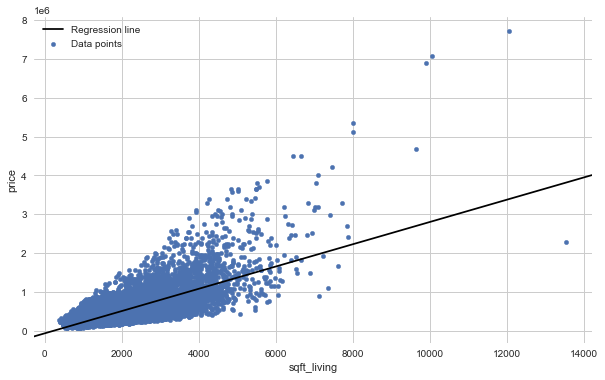

In [26]:
# plotting the regression line
fig, ax = plt.subplots(figsize=(10,6))
data.plot.scatter(x="sqft_living", y="price", label="Data points", ax=ax)
sm.graphics.abline_plot(model_results=baseline_results, label="Regression line", ax=ax, color="black")
ax.legend();

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15762 entries, 1 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             15762 non-null  int64         
 1   date           15762 non-null  datetime64[ns]
 2   price          15762 non-null  float64       
 3   bedrooms       15762 non-null  int64         
 4   bathrooms      15762 non-null  float64       
 5   sqft_living    15762 non-null  int64         
 6   sqft_lot       15762 non-null  int64         
 7   floors         15762 non-null  float64       
 8   waterfront     15762 non-null  int64         
 9   view           15762 non-null  object        
 10  condition      15762 non-null  int64         
 11  grade          15762 non-null  int64         
 12  sqft_above     15762 non-null  int64         
 13  sqft_basement  15429 non-null  float64       
 14  yr_built       15762 non-null  int64         
 15  yr_renovated   1576

Outliers 

In [28]:
one_hot = pd.get_dummies(data['condition'], drop_first=True) 
df_1 = data.drop('condition',axis = 1)
df_1 = data.join(one_hot)

In [29]:
count = 0
bath_outliers = []
mean = np.mean(data['bathrooms'])
max_distance = np.std(data['bathrooms']) * 3 

for idx, row in data['bathrooms'].T.iteritems():
    if abs(row-mean) >= max_distance:
        count += 1
        data.drop(idx, inplace=True)
count
df_1 = data.join(one_hot)

# Outliers